In [5]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [9]:
#define state
class BMIState(TypedDict):

    weight_kg: float
    height_m: float
    bmi: float
    falls_in: str

In [10]:
def calculate_bmi(state: BMIState) -> BMIState:

    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight / (height ** 2)

    state['bmi'] = round(bmi,2)

    return state


In [11]:
def person_bmi(state: BMIState) -> BMIState:
    
    bmi = state['bmi']

    if bmi < 18.5:
        state['falls_in'] = 'underweight'
    elif bmi < 24.9:
        state['falls_in'] = 'normal'
    elif bmi < 29.9:
        state['falls_in'] = 'overweight'
    else:
        state['falls_in'] = 'obese'
    
    return state

In [12]:
#define your graph
graph = StateGraph(BMIState)

#add nodes to your graph
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('person_falls_in',person_bmi)

#add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'person_falls_in')
graph.add_edge('person_falls_in', END)

#compile the graph
workflow = graph.compile()

In [13]:
#execute the graph
initial_state = {
    'height_m': 1.73,
    'weight_kg': 80,
}

final_state = workflow.invoke(initial_state)

print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'falls_in': 'overweight'}


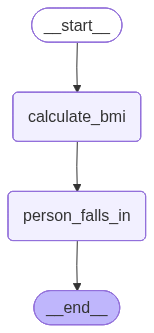

In [14]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())